In [1]:
import pandas as pd
import numpy as np

excel_file = 'Data/World Black Rhino Population DataSet.xlsx'

# Reading the Excel file, dropping rows where 'DATE' or 'Number of Black Rhino' are NaN
df = pd.read_excel(excel_file, engine='openpyxl').dropna(subset=['DATE', 'Number of Black Rhino'])

X_initial = df['DATE'].to_numpy()
Y = df['Number of Black Rhino'].to_numpy()

# Normalizing the 'DATE' feature to prevent overflow due to large feature values
X_normalized = (X_initial - np.mean(X_initial)) / np.std(X_initial)

# Adding a bias column to X after normalization
m = len(X_normalized)  # Total number of samples
X = np.c_[X_normalized, np.ones(m)]

# Initializing theta parameters with small random values
theta = np.random.uniform(low=-0.1, high=0.1, size=(2, 1))


In [2]:
# Mean Squared Error cost function
def compute_cost(X, Y, theta):
    m = len(Y)
    F = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(F - Y))
    return cost

In [3]:
# Algorithm parameters
alpha = 0.5  # Learning rate
iterations = 50  # Number of iterations

# Gradient Descent function
def gradient_descent(X, Y, theta, alpha, iterations):
    m = len(Y)  # Number of samples
    cost_history = np.zeros(iterations)  # To record the cost evolution at each iteration
    
    for i in range(iterations):
        F = X.dot(theta)
        gradient = (1/m) * X.T.dot(F - Y)
        theta -= alpha * gradient
        cost_history[i] = compute_cost(X, Y, theta)
    
    return theta, cost_history

# Optimizing theta parameters
theta_optimal, cost_history = gradient_descent(X, Y.reshape(-1, 1), theta, alpha, iterations)

print("Optimized parameters (theta):", theta_optimal.flatten())

Optimized parameters (theta): [1313.0103512 4476.5      ]


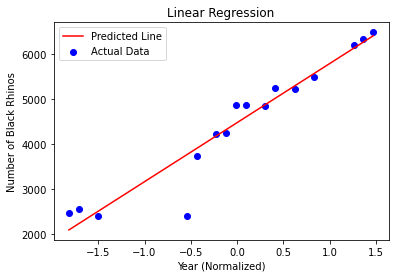

In [4]:
import matplotlib.pyplot as plt

# Predictions on the entire X data to plot the regression line
Y_pred = X.dot(theta_optimal)

# Plotting the actual data as a scatter plot
plt.scatter(X[:, 0], Y, color='blue', label='Actual Data')

# Plotting the regression line
plt.plot(X[:, 0], Y_pred, color='red', label='Predicted Line')

plt.title('Linear Regression')
plt.xlabel('Year (Normalized)')
plt.ylabel('Number of Black Rhinos')
plt.legend()
plt.show()

In [5]:
# Normalize the year 2026
year_2026_normalized = (2026 - np.mean(X_initial)) / np.std(X_initial)

# Add bias term
year_2026_normalized_with_bias = np.array([year_2026_normalized, 1])

# Make prediction for the normalized year
predicted_rhinos_2026 = year_2026_normalized_with_bias.dot(theta_optimal)

print("Predicted number of black rhinos in 2026:", predicted_rhinos_2026)

Predicted number of black rhinos in 2026: [6827.00026376]
